In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [13]:
## your code
n = 21
a = np.arange(1, n)
b = np.ones_like(a) * 2
two_powers = np.power(b, a)
answer = two_powers / a
print(answer)

[2.00000000e+00 2.00000000e+00 2.66666667e+00 4.00000000e+00
 6.40000000e+00 1.06666667e+01 1.82857143e+01 3.20000000e+01
 5.68888889e+01 1.02400000e+02 1.86181818e+02 3.41333333e+02
 6.30153846e+02 1.17028571e+03 2.18453333e+03 4.09600000e+03
 7.71011765e+03 1.45635556e+04 2.75941053e+04 5.24288000e+04]


**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [21]:
# naive solution to check
test = 0
for i in range(6):
    test += 0.1 ** (3 * i) * 0.2 ** (4 * i)

## your code
n = 6
a = np.arange(0, n)
first = np.power(0.1, a * 3)
second = np.power(0.2, a * 4)
answer = first @ second

assert answer == ans2

**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [34]:
## your code
n = 8
a = np.zeros((n, n)).astype(np.int)
a[::2, ::2] = 1
a[::-2, ::-2] = 1
a

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


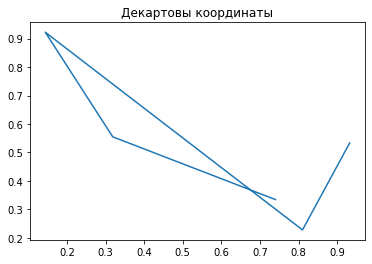

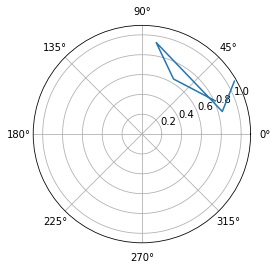

In [79]:
X = np.random.random((5, 2))

## your code

def get_phi(x, y):
    return np.arctan(y / x)

def get_r(x, y):
    row = np.array([x, y])
    return np.linalg.norm(row)

get_phi_v = np.vectorize(get_phi)
get_r_v = np.vectorize(get_r)

Y = np.vstack((get_phi_v(X[:, 0], X[:, 1]), get_r_v(X[:, 0], X[:, 1]))).T

plt.figure()
plt.title('Декартовы координаты')
plt.plot(X[:, 0], X[:, 1])
plt.figure()
plt.title('Полярные координаты')
plt.polar(Y[:, 0], Y[:, 1])

**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [105]:
n = 5
X = np.random.randint(1, 100, (n, n))

## your code
print(X)
m = np.argmax(X)
print(f'Индексы максимального элемента: ({m % n}, {m // n})')

[[10 85 95 92 67]
 [45  1 33 20  2]
 [69 36 87 30 27]
 [68 96 77 14 65]
 [91 86 90 84  7]]
Индексы максимального элемента: (1, 3)


**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

In [122]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))

## your code
def metric(x1, x2, y1, y2):
    x = np.array([x1, x2])
    y = np.array([y1, y2])
    return np.linalg.norm(x - y)

metric_v = np.vectorize(metric)
distances = metric_v(X[:, 0], X[:, 1], y[:, 0], y[:, 1])
closest_element = distances.argmin()
print(f'Ближайший элемент к y под индексом {closest_element}')

Ближайший элемент к y под индексом 7


**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

In [127]:
## your code
x1 = np.linspace(-3, 0, 10)
x2 = np.linspace(0, 2, 10)
x3 = np.linspace(2, 3, 10)
x = np.vstack((x1, x2, x3)).reshape(-1)

y1 = np.power(x1, 2) + 2 * x1 + 6
y2 = x2 + 6
y3 = np.power(x3, 2) + 4 * x3 - 4

y = np.vstack((y1, y2, y3)).reshape(-1)

print(x)
print(y)

[-3.         -2.66666667 -2.33333333 -2.         -1.66666667 -1.33333333
 -1.         -0.66666667 -0.33333333  0.          0.          0.22222222
  0.44444444  0.66666667  0.88888889  1.11111111  1.33333333  1.55555556
  1.77777778  2.          2.          2.11111111  2.22222222  2.33333333
  2.44444444  2.55555556  2.66666667  2.77777778  2.88888889  3.        ]
[ 9.          7.77777778  6.77777778  6.          5.44444444  5.11111111
  5.          5.11111111  5.44444444  6.          6.          6.22222222
  6.44444444  6.66666667  6.88888889  7.11111111  7.33333333  7.55555556
  7.77777778  8.          8.          8.90123457  9.82716049 10.77777778
 11.75308642 12.75308642 13.77777778 14.82716049 15.90123457 17.        ]


**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [140]:
n = 10
X = np.random.random((n, n))

## your code
# np.ones_like(X) * X.mean(axis=0)

X = X - np.ones((n, 1)) * X.mean(axis=0)
X.mean(axis=0)

array([ 7.77156117e-17, -1.11022302e-17, -1.11022302e-16,  2.22044605e-17,
        2.22044605e-17,  3.33066907e-17,  4.44089210e-17,  9.99200722e-17,
       -2.22044605e-17, -2.22044605e-17])

**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [189]:
X = np.random.normal(loc=5, scale=2., size=1000)

X.mean(), X.var()

(4.974172975277297, 4.020592558129358)

**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [207]:
## your code
n = 5
a = np.arange(0, n)
np.array(list(map(lambda x: np.roll(a, -x), a)))

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 0],
       [2, 3, 4, 0, 1],
       [3, 4, 0, 1, 2],
       [4, 0, 1, 2, 3]])

**11.** Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [109]:
def sample_1(x, c):
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
        res.append(idx)
    return res

            
sample_1([50, 3, 1, 7, 20], 5)   

[0, 3, 0, 0, 0]

Реализуйте данный алгоритм более оптимальным способом, без использования циклов.

In [108]:
## your code
def sample_2(x, c):
    assert len(x) > 0
    
    x = np.array(x).reshape(-1, 1)
    
    n = len(x)
    s = np.sum(x)
    
    val = s * np.random.random((c, 1)) * np.ones((c, n)) # Генерируем матрицу, у которой в строках одинаковые элементы ("ограничения")
    
    m = np.tril(np.ones((n, n))) # Генирируем нижнюю треугольную матрицу
    temp = (m @ x).T
    return np.sum(temp < val, axis=1)

np.random.seed(0)
x = [50, 3, 1, 7, 20]
c = 5
# simple test
assert (sample_1(x, c) - sample_2(x, c) < 10 ** (8)).all()

# advanced test
for i in range(1, 100):
    np.random.seed(i)
    x = np.random.randint(low=1, high=100, size=(i,))
    c = np.random.randint(low=1, high=10)
    assert (sample_1(x, c) - sample_2(x, c) < 10 ** (6)).all()